In [1]:
import pandas as pd

heart_a = pd.read_csv('/kaggle/input/sound-heartbeat/trained_set_a_hearbeat_sound.csv')
heart_b = pd.read_csv('/kaggle/input/sound-heartbeat/trained_set_b_hearbeat_sound.csv')

In [2]:
heart_a.head()

,filename,prediction,confidence
0,artifact__201106131834.wav,Music,0.573096
1,Aunlabelledtest__201106061215.wav,Silence,0.646827
2,artifact__201106101955.wav,Explosion,0.215462
3,normal__201101151127.wav,Static,0.146756
4,artifact__201106220340.wav,Music,0.144458


In [3]:
heart_b.head()

,filename,prediction,confidence
0,Bunlabelledtest__231_1308748318393_C.wav,"Heart sounds, heartbeat",0.605979
1,Bunlabelledtest__157_1306937583792_C.wav,"Heart sounds, heartbeat",0.744683
2,Bunlabelledtest__152_1306779561195_C.wav,"Heart sounds, heartbeat",0.742264
3,normal__280_1311165195344_A.wav,"Heart sounds, heartbeat",0.784581
4,normal_noisynormal_167_1307111318050_A1.wav,"Heart sounds, heartbeat",0.316097


In [4]:
heartbeat_files_a = heart_a[heart_a['prediction'].str.contains('heartbeat|Heart sounds', case=False, na=False)]
heartbeat_files_a

,filename,prediction,confidence
13,normal__201104122156.wav,"Heart sounds, heartbeat",0.274840
30,Aunlabelledtest__201104012144.wav,"Heart sounds, heartbeat",0.394481
47,normal__201103140822.wav,"Heart sounds, heartbeat",0.192685
54,extrahls__201101241433.wav,"Heart sounds, heartbeat",0.652478
61,Aunlabelledtest__201101110659.wav,"Heart sounds, heartbeat",0.347221
68,Aunlabelledtest__201101241434.wav,"Heart sounds, heartbeat",0.599679
92,Aunlabelledtest__201106030607.wav,"Heart sounds, heartbeat",0.112167
107,murmur__201106141148.wav,"Heart sounds, heartbeat",0.309289
108,normal__201106111136.wav,"Heart sounds, heartbeat",0.163311
139,extrahls__201103150114.wav,"Heart sounds, heartbeat",0.342277


In [5]:
heartbeat_files_b = heart_b[heart_b['prediction'].str.contains('heartbeat|Heart sounds', case=False, na=False)]
heartbeat_files_b

,filename,prediction,confidence
0,Bunlabelledtest__231_1308748318393_C.wav,"Heart sounds, heartbeat",0.605979
1,Bunlabelledtest__157_1306937583792_C.wav,"Heart sounds, heartbeat",0.744683
2,Bunlabelledtest__152_1306779561195_C.wav,"Heart sounds, heartbeat",0.742264
3,normal__280_1311165195344_A.wav,"Heart sounds, heartbeat",0.784581
4,normal_noisynormal_167_1307111318050_A1.wav,"Heart sounds, heartbeat",0.316097
...,...,...,...
651,normal__152_1306779561195_D.wav,"Heart sounds, heartbeat",0.543519
652,murmur__292_1311185449649_C.wav,"Heart sounds, heartbeat",0.722320
653,normal__190_1308076920011_C1.wav,"Heart sounds, heartbeat",0.694196
654,normal_noisynormal_146_1306778707532_D.wav,"Heart sounds, heartbeat",0.683738


In [6]:
heartbeat_files_combined = pd.concat([heartbeat_files_b, heartbeat_files_a], ignore_index=True)
heartbeat_files_combined

,filename,prediction,confidence
0,Bunlabelledtest__231_1308748318393_C.wav,"Heart sounds, heartbeat",0.605979
1,Bunlabelledtest__157_1306937583792_C.wav,"Heart sounds, heartbeat",0.744683
2,Bunlabelledtest__152_1306779561195_C.wav,"Heart sounds, heartbeat",0.742264
3,normal__280_1311165195344_A.wav,"Heart sounds, heartbeat",0.784581
4,normal_noisynormal_167_1307111318050_A1.wav,"Heart sounds, heartbeat",0.316097
...,...,...,...
650,extrahls__201104270459.wav,"Heart sounds, heartbeat",0.593757
651,extrahls__201103200218.wav,"Heart sounds, heartbeat",0.267867
652,extrahls__201104270458.wav,"Heart sounds, heartbeat",0.364745
653,normal__201106141148.wav,"Heart sounds, heartbeat",0.316318


In [7]:
heartbeat_files_combined['type_of_heart'] = heartbeat_files_combined['confidence'].apply(lambda x: 'Normal' if x >= 0.5 else 'Non-Normal')
heartbeat_files_combined

,filename,prediction,confidence,type_of_heart
0,Bunlabelledtest__231_1308748318393_C.wav,"Heart sounds, heartbeat",0.605979,Normal
1,Bunlabelledtest__157_1306937583792_C.wav,"Heart sounds, heartbeat",0.744683,Normal
2,Bunlabelledtest__152_1306779561195_C.wav,"Heart sounds, heartbeat",0.742264,Normal
3,normal__280_1311165195344_A.wav,"Heart sounds, heartbeat",0.784581,Normal
4,normal_noisynormal_167_1307111318050_A1.wav,"Heart sounds, heartbeat",0.316097,Non-Normal
...,...,...,...,...
650,extrahls__201104270459.wav,"Heart sounds, heartbeat",0.593757,Normal
651,extrahls__201103200218.wav,"Heart sounds, heartbeat",0.267867,Non-Normal
652,extrahls__201104270458.wav,"Heart sounds, heartbeat",0.364745,Non-Normal
653,normal__201106141148.wav,"Heart sounds, heartbeat",0.316318,Non-Normal


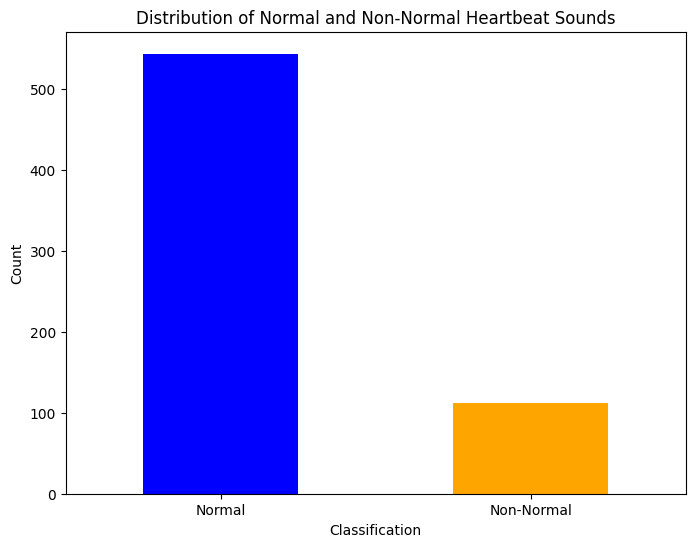

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each classification
distribution = heartbeat_files_combined['type_of_heart'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Normal and Non-Normal Heartbeat Sounds')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'classification' column
heartbeat_files_combined['type_of_heart_encoded'] = label_encoder.fit_transform(heartbeat_files_combined['type_of_heart'])
heartbeat_files_combined

,filename,prediction,confidence,type_of_heart,type_of_heart_encoded
0,Bunlabelledtest__231_1308748318393_C.wav,"Heart sounds, heartbeat",0.605979,Normal,1
1,Bunlabelledtest__157_1306937583792_C.wav,"Heart sounds, heartbeat",0.744683,Normal,1
2,Bunlabelledtest__152_1306779561195_C.wav,"Heart sounds, heartbeat",0.742264,Normal,1
3,normal__280_1311165195344_A.wav,"Heart sounds, heartbeat",0.784581,Normal,1
4,normal_noisynormal_167_1307111318050_A1.wav,"Heart sounds, heartbeat",0.316097,Non-Normal,0
...,...,...,...,...,...
650,extrahls__201104270459.wav,"Heart sounds, heartbeat",0.593757,Normal,1
651,extrahls__201103200218.wav,"Heart sounds, heartbeat",0.267867,Non-Normal,0
652,extrahls__201104270458.wav,"Heart sounds, heartbeat",0.364745,Non-Normal,0
653,normal__201106141148.wav,"Heart sounds, heartbeat",0.316318,Non-Normal,0


In [10]:
# Setup 'classification_encoded' as X and 'confidence' as y
X = heartbeat_files_combined['type_of_heart_encoded']
y = heartbeat_files_combined['confidence']

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test

(328    1
 210    0
 140    1
 338    1
 43     1
       ..
 71     1
 106    0
 270    1
 435    1
 102    1
 Name: type_of_heart_encoded, Length: 491, dtype: int64,
 333    1
 78     1
 503    1
 290    1
 360    0
       ..
 89     1
 480    1
 567    1
 467    1
 336    1
 Name: type_of_heart_encoded, Length: 164, dtype: int64,
 328    0.695397
 210    0.386028
 140    0.843373
 338    0.527850
 43     0.583950
          ...   
 71     0.916965
 106    0.385224
 270    0.900033
 435    0.661446
 102    0.784592
 Name: confidence, Length: 491, dtype: float64,
 333    0.877562
 78     0.559411
 503    0.645732
 290    0.886474
 360    0.416133
          ...   
 89     0.755261
 480    0.892175
 567    0.846422
 467    0.979640
 336    0.742650
 Name: confidence, Length: 164, dtype: float64)

In [12]:
# Binarize the target variable 'confidence' based on a threshold of 0.5
y_bin = (y >= 0.5).astype(int)

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the standard scaler
scaler = StandardScaler()

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store all predictions and true labels
all_predictions = []
all_true_labels = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_bin.iloc[train_index], y_bin.iloc[test_index]
    
    # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
    X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))
    
    # Define the neural network model architecture
    def build_model(input_dim, num_classes):
        model = Sequential()
        model.add(Dense(64, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        return model

    # Build and train the model
    model = build_model(input_dim=X_train_scaled.shape[1], num_classes=2)
    
    # Early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train_scaled, pd.get_dummies(y_train), epochs=5, batch_size=32, validation_data=(X_test_scaled, pd.get_dummies(y_test)), callbacks=[early_stop], verbose=1)
    
    # Predict probabilities on the test set
    y_pred_proba = model.predict(X_test_scaled)
    
    # Store the predictions and true labels
    all_predictions.append(y_pred_proba)
    all_true_labels.append(pd.get_dummies(y_test).values)

# Combine all predictions and true labels
y_pred_proba_all = np.vstack(all_predictions)
y_true_all = np.vstack(all_true_labels)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_pred_proba_all, multi_class='ovr')
roc_auc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.6760 - val_loss: 0.5101
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4600 - val_loss: 0.2949
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2570 - val_loss: 0.1364
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1192 - val_loss: 0.0566
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0531 - val_loss: 0.0260
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.6712 - val_loss: 0.5093
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5082 - val_loss: 0.3845
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3703 - val_loss: 0.2627
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2554 - val_loss: 0.1466
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1450 - val_loss: 0.0705
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.6764 - val_loss: 0.5649
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5073 - val_loss: 0.3746
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3207 - val_loss: 0.1968
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1659 - val_loss: 0.0832
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0705 - val_loss: 0.0352
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.7162 - val_loss: 0.5248
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4816 - val_loss: 0.3338
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2953 - val_loss: 0.1725
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1455 - val_loss: 0.0750
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670 - val_loss: 0.0334
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.6841 - val_loss: 0.4832
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4553 - val_loss: 0.2894
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2640 - val_loss: 0.1497
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1343 - val_loss: 0.0707
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0642 - val_loss: 0.0353
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


1.0

In [14]:
import joblib

# Save the trained model to a pickle file
model_filename = 'heartbeat_model.pkl'
joblib.dump(model, model_filename)

['heartbeat_model.pkl']

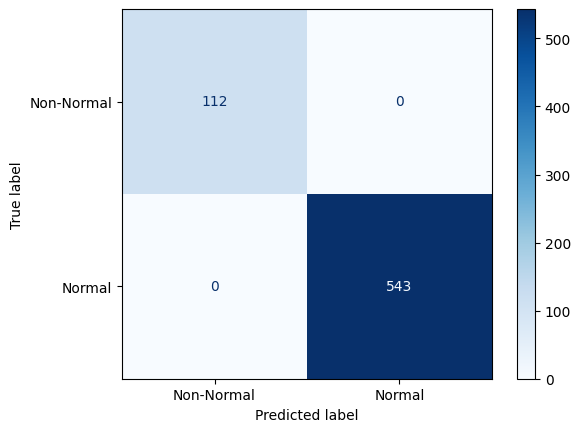

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convert predictions to binary labels based on a threshold of 0.5
y_pred_binary = (y_pred_proba_all[:, 1] >= 0.5).astype(int)
y_true_binary = np.argmax(y_true_all, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Normal', 'Normal'])
disp.plot(cmap='Blues')

- After trained, 543 heartbeat sounds are classified as normal, and 112 are classified as non-normal.